# Lab 13

## Section 1: PyTorch 



## Import Torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

: 

In [ ]:
pip install torch

### Task 1: GPU/Device Agnostic Code
**Goal:** Write code that runs on CPU, CUDA, or MPS (Mac) automatically.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'Using device: {device}')


sample_input = torch.randn(1, 10).to(device)
type(sample_input)

Using device: mps


torch.Tensor

In [ ]:
sample_input

tensor([[-1.1961,  2.2492,  1.1180,  0.7724,  0.3377, -0.7044,  0.1754,  0.8937,
         -0.9713, -0.1360]], device='mps:0')

## Section 2: MNIST Project 
Step 1: What is MNIST & Downloading Data

Concept: MNIST is the "Hello World" of Machine Learning. It contains 70,000 images of handwritten digits (0-9).

The Goal: Teach the computer to look at a grid of pixels and say "That is a 7".

The Data: Each image is grayscale and exactly 28×28


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# transform=ToTensor() converts the image (0-255) to a Torch Tensor (0.0-1.0)

In [ ]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Visualizing One Image & Understanding Shapes

In [ ]:
len(training_data)

60000

In [ ]:
len(test_data)

10000

In [ ]:
img, label = training_data[0]

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
img.squeeze().shape

torch.Size([28, 28])

## Display one Image in MatplotLib

In [ ]:
import matplotlib.pyplot as plt

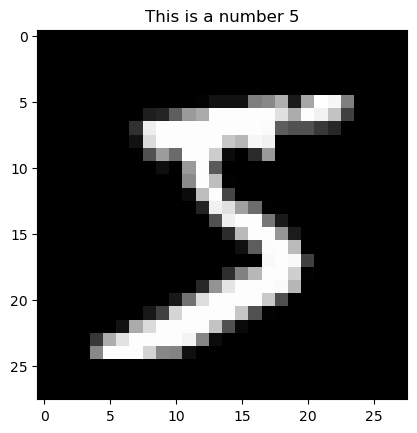

In [ ]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"This is a number {label}")
plt.show()

# Calculation for the Input Layer

Concept: We are building a Linear (Feed-Forward) Network,

A Linear Layer consists of neurons in a single vertical line.

Our image is a square grid (28×28).

The Division: We must "cut" the image row by row and stack them into one long line.

The Calculation:

Height×Width=Total Input Features
28×28=784
So, our Input Layer must have 784 neurons.

In [ ]:
img, label = training_data[1]

In [ ]:
img.squeeze().shape

torch.Size([28, 28])

## The Architecture (1 Input, 1 Hidden, 1 Output
The Concept: We will build the simplest standard network.

Input Layer (784): Receives the pixels.

Hidden Layer (128): The "brain" that learns shapes (loops, lines). We pick 128 because it's enough to learn but not too big.

Output Layer (10): The final decision. We have 10 digits (0-9), so we need 10 output scores.

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        
        self.layers = nn.Sequential(
            nn.Linear(784, 128), 
            nn.ReLU(),# Activation 
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers(x)
        return logits

model = SimpleNet()
print(model)

SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Understanding Batch Size (The Stack)

The Concept: Think of the model like a teacher grading exams.

Batch Size = 1: The teacher grades 1 exam, updates the grade book, then picks up the next exam. (Too slow).

Batch Size = 64: The teacher picks up a stack of 64 exams, grades them all at once, and updates the grade book one time for the whole stack. (Much faster).

We use DataLoader to create these "stacks" for us.

In [ ]:
from torch.utils.data import DataLoader

# Create stacks
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

print(len(train_loader),"--",len(test_loader))


938 -- 157


## The Training Loop

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train():
    model.train()
    
    # Epoch Loop - Train for multiple epochs
    num_epochs = 5
    
    for epoch in range(num_epochs):
        print(f"\n--- Epoch {epoch + 1}/{num_epochs} ---")
        
        for batch_No, (data, target) in enumerate(train_loader):
            
            output = model(data)
            
            loss = loss_fn(output, target)
            
            # Backpropagation
            optimizer.zero_grad()  # Clear old calculations
            loss.backward()        # Calculate gradients
            optimizer.step()       # Update weights
            
            if batch_No % 100 == 0:
                print(f"Batch {batch_No}: Loss = {loss.item():.4f}")
        
        print(f"Epoch {epoch + 1} completed!")

# Run training

In [ ]:
train()

Batch 0: Loss = 2.2587
Batch 100: Loss = 0.4718
Batch 200: Loss = 0.2364
Batch 300: Loss = 0.3395
Batch 400: Loss = 0.1946
Batch 500: Loss = 0.3256
Batch 600: Loss = 0.1262
Batch 700: Loss = 0.2901
Batch 800: Loss = 0.4627
Batch 900: Loss = 0.0775


In [ ]:
def test():
    model.eval() 
    correct = 0
    
    with torch.no_grad(): 
        for data, target in test_loader:
            output = model(data)
            
            prediction = output.argmax(dim=1) 
            
            correct += (prediction == target).sum().item()

    accuracy = correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.1%}")

test()

Test Accuracy: 94.6%
